# import libraries

In [31]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# read data

In [32]:
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# alies for all columns

In [33]:
for name in data.columns:
    if " " in name:
        sc=name[0:name.index(" ")]
        data.rename({name:sc},axis=1,inplace=True)

In [34]:
data

,CustomerID,Gender,Age,Annual,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# check null and data types

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Annual      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# check outliers

In [36]:
data.describe()

,CustomerID,Age,Annual,Spending
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Perform EDE to understand DATA  

<Axes: xlabel='Annual', ylabel='Age'>

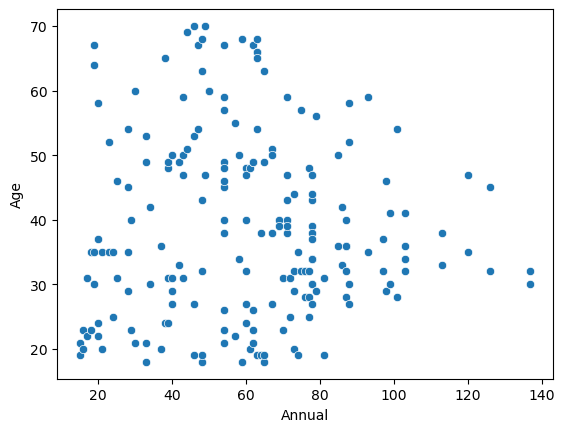

In [37]:
sns.scatterplot(x=data["Annual"],y=data["Age"])

# there is relation between Annual and Spending

<Axes: xlabel='Annual', ylabel='Spending'>

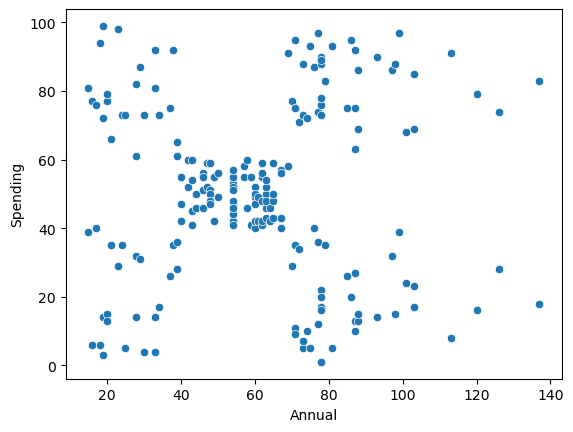

In [38]:
sns.scatterplot(x=data["Annual"],y=data["Spending"])

In [39]:
co=data[["Annual","Spending"]].values
co

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Scaling data to ignore dominant

In [131]:
st = StandardScaler()
st.fit(co)
st_data=st.transform(co)

# Use Elbon method to choose best number of clusters

In [132]:
iner = []
m = range(2,11)
for num in m :
    km_data = KMeans(n_clusters = num,init = "k-means++",random_state = 42)
    km_data.fit(st_data)
    iner.append(km_data.inertia_)

C:\Users\AWIN1903\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AWIN1903\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AWIN1903\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AWIN1903\AppData\Roaming\Python\Python311\site-packages\sklea

<Axes: >

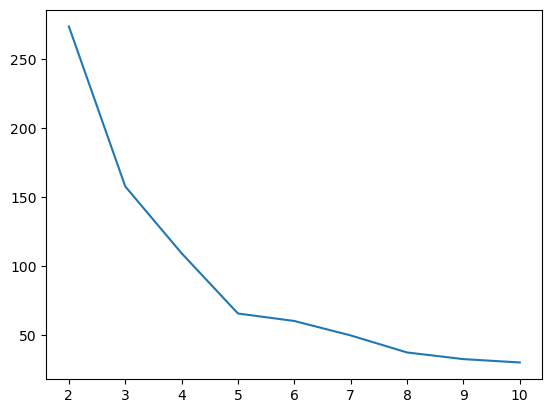

In [133]:
sns.lineplot(x = m , y = iner)

# use KMean Algorithm

In [134]:
nd = KMeans(n_clusters=5 , init="k-means++" , random_state=42)
nd.fit(st_data)
predict=nd.predict(st_data)


C:\Users\AWIN1903\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# prediction

In [135]:
data["label"] = predict

In [136]:
data

,CustomerID,Gender,Age,Annual,Spending,label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


# visualization 

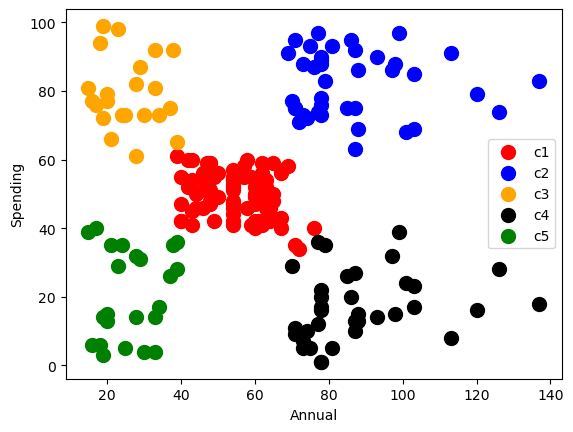

In [137]:
plt.scatter(data[predict==0]["Annual"],data[predict==0]["Spending"], s=100 , c="red" , label="c1")
plt.scatter(data[predict==1]["Annual"],data[predict==1]["Spending"], s=100 , c="blue" , label="c2")
plt.scatter(data[predict==2]["Annual"],data[predict==2]["Spending"], s=100 , c="orange" , label="c3")
plt.scatter(data[predict==3]["Annual"],data[predict==3]["Spending"], s=100 , c="black" , label="c4")
plt.scatter(data[predict==4]["Annual"],data[predict==4]["Spending"], s=100 , c="green" , label="c5")

plt.xlabel("Annual")
plt.ylabel("Spending")
plt.legend()
plt.show()
